In [1]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_profiling as pp
import missingno as mno
from sklearn import linear_model
from prettytable import PrettyTable
import random
from missingpy import MissForest
from sklearn import tree
from math import floor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [3]:
df = pd.read_csv("abalone.csv")

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.shape

(4177, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [9]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

In [10]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Data Modeling

In [11]:
#getting features 

x = df.drop('Rings', axis = 1)

# Getting Predicting Value
y = df['Rings']

In [12]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [13]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # Getting F1 score
    f1_logisreg = f1_score(yt, logi_pred,average='weighted')
    f1_lda = f1_score(yt, lda_pred,average='weighted')
    f1_ganb = f1_score(yt, gnb_pred,average='weighted')
    f1_dtree = f1_score(yt, dtc_pred,average='weighted')
    f1_rf = f1_score(yt, rfc_pred,average='weighted')
    f1_svc = f1_score(yt, svm_pred,average='weighted')
    f1_knn = f1_score(yt, knn_pred,average='weighted')
    
    # MOdel Accuracy Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy_Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Accuracy_Score', ascending=False))
    sns.barplot(x = models['Accuracy_Score'], y = models['Model'], palette='viridis');
    
    # MOdel F1 Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'F1_Score': [f1_logisreg, f1_lda, f1_ganb, f1_dtree, f1_rf, f1_svc, f1_knn]})

    print(models.sort_values(by='F1_Score', ascending=False))
    sns.barplot(x = models['F1_Score'], y = models['Model'], palette='viridis');

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.278947
0           Logistic Regression        0.276316
2                   Naive Bayes        0.252632
6         K - Nearest Neighbors        0.242105
4                 Random Forest        0.236842
5       Support Vector Machines        0.223684
3                 Decision Tree        0.178947
                          Model  F1_Score
1  Linear Discriminant Analysis  0.249707
0           Logistic Regression  0.224269
4                 Random Forest  0.223814
6         K - Nearest Neighbors  0.221713
2                   Naive Bayes  0.213966
5       Support Vector Machines  0.183443
3                 Decision Tree  0.177479


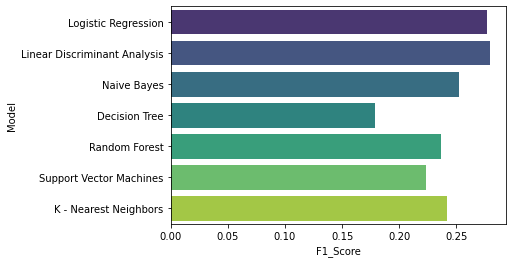

In [14]:
Classification_models(x_train, y_train, x_test, y_test)

### Using KNN imputer

## 1% imputataion

In [15]:
data_1 = df.copy()

In [16]:
data_1 = data_1.iloc[:,1:8].mask(np.random.random(data_1.iloc[:,1:8].shape) < .01)
data_1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [17]:
data_1['Sex']= df['Sex']
data_1['Rings'] = df["Rings"]
df_one = data_1.copy()

In [18]:
df_knn = df_one.copy()
df_knn

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [21]:
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2.0,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1.0,7.0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,11.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0,10.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0,9.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,10.0


In [22]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


### DATA MODELING

In [23]:
#getting features 
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [24]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


                          Model  Accuracy_Score
0           Logistic Regression        0.305263
1  Linear Discriminant Analysis        0.297368
4                 Random Forest        0.271053
2                   Naive Bayes        0.263158
5       Support Vector Machines        0.260526
6         K - Nearest Neighbors        0.250000
3                 Decision Tree        0.200000
                          Model  F1_Score
1  Linear Discriminant Analysis  0.271632
4                 Random Forest  0.260055
0           Logistic Regression  0.253185
6         K - Nearest Neighbors  0.232954
2                   Naive Bayes  0.223114
5       Support Vector Machines  0.220341
3                 Decision Tree  0.199820


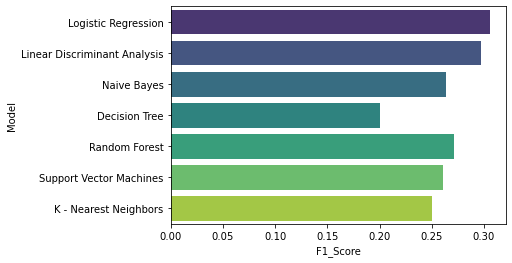

In [25]:
Classification_models(x_train, y_train, x_test, y_test)

### 5% Imputation

In [26]:
data_5 = df.copy()

In [27]:
data_5 = data_5.iloc[:,1:8].mask(np.random.random(data_5.iloc[:,1:8].shape) < .05)
data_5

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,NaN,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,NaN
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,NaN,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,NaN,0.2610,0.2960


In [28]:
data_5['Sex']= df['Sex']
data_5['Rings'] = df["Rings"]
df_five = data_5.copy()

In [29]:
df_knn = df_five.copy()
df_knn

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,NaN,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,NaN,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,NaN,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,NaN,0.2610,0.2960,0,10


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [32]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.466,0.3650,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.2650,0.090,0.2255,0.0995,0.0485,0.0708,2,7
2,0.530,0.4200,0.135,0.6770,0.2565,0.1415,0.2061,0,9
3,0.440,0.3650,0.125,0.5160,0.2155,0.1140,0.1604,2,10
4,0.330,0.2550,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.4500,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.4400,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.604,0.4750,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.4850,0.150,1.0945,0.4930,0.2610,0.2960,0,10


In [33]:
#getting features 
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [34]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


                          Model  Accuracy_Score
0           Logistic Regression        0.310526
1  Linear Discriminant Analysis        0.289474
4                 Random Forest        0.286842
2                   Naive Bayes        0.271053
5       Support Vector Machines        0.268421
6         K - Nearest Neighbors        0.242105
3                 Decision Tree        0.215789
                          Model  F1_Score
4                 Random Forest  0.272329
1  Linear Discriminant Analysis  0.260834
0           Logistic Regression  0.257286
2                   Naive Bayes  0.229894
5       Support Vector Machines  0.226831
6         K - Nearest Neighbors  0.222354
3                 Decision Tree  0.217441


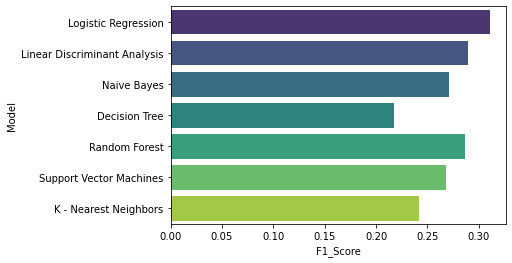

In [35]:
Classification_models(x_train, y_train, x_test, y_test)

### 10% Imputation

In [36]:
data_10 = df.copy()

In [37]:
data_10 = data_10.iloc[:,1:8].mask(np.random.random(data_10.iloc[:,1:8].shape) < .1)
data_10

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,NaN
1,0.350,0.265,NaN,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN
3,NaN,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,NaN,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [38]:
data_10['Sex']= df['Sex']
data_10['Rings'] = df["Rings"]
df_ten = data_10.copy()

In [39]:
df_knn = df_ten.copy()
df_knn

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,NaN,2,15
1,0.350,0.265,NaN,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0,9
3,NaN,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,NaN,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [41]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [42]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.22450,0.1010,0.18155,2,15
1,0.350,0.265,0.094,0.2255,0.09950,0.0485,0.07000,2,7
2,0.530,0.420,0.135,0.6770,0.25650,0.1415,0.21275,0,9
3,0.470,0.365,0.125,0.5160,0.21550,0.1140,0.15500,2,10
4,0.330,0.255,0.080,0.2050,0.08950,0.0395,0.05500,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.37000,0.2390,0.24900,0,11
4173,0.590,0.440,0.135,0.9660,0.43900,0.2145,0.26050,2,10
4174,0.600,0.475,0.205,1.1760,0.55155,0.2875,0.30800,2,9
4175,0.625,0.485,0.150,1.0945,0.53100,0.2610,0.29600,0,10


In [43]:
#getting features 
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [44]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.310526
0           Logistic Regression        0.302632
4                 Random Forest        0.284211
6         K - Nearest Neighbors        0.284211
2                   Naive Bayes        0.273684
5       Support Vector Machines        0.268421
3                 Decision Tree        0.207895
                          Model  F1_Score
1  Linear Discriminant Analysis  0.280282
4                 Random Forest  0.272754
6         K - Nearest Neighbors  0.267856
0           Logistic Regression  0.249008
2                   Naive Bayes  0.234549
5       Support Vector Machines  0.226303
3                 Decision Tree  0.208781


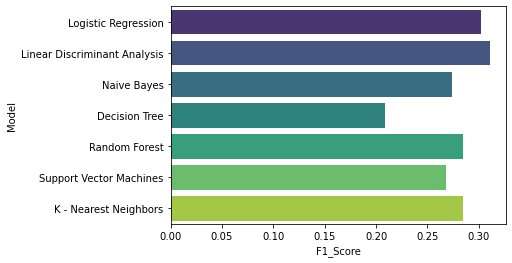

In [45]:
Classification_models(x_train, y_train, x_test, y_test)

### 20% imputation

In [46]:
data_20 = df.copy()

In [47]:
data_20 = data_20.iloc[:,1:8].mask(np.random.random(data_20.iloc[:,1:8].shape) < .2)
data_20

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,NaN,NaN,0.135,0.6770,NaN,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,NaN,NaN,0.2050,0.0895,0.0395,NaN
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,NaN,0.440,0.135,0.9660,0.4390,NaN,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [48]:
data_20['Sex'] = df["Sex"]
data_20['Rings'] = df['Rings']
df_twenty = data_20.copy()

In [49]:
df_knn = df_twenty.copy()
df_knn

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,NaN,NaN,0.135,0.6770,NaN,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,NaN,NaN,0.2050,0.0895,0.0395,NaN,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,NaN,0.440,0.135,0.9660,0.4390,NaN,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [51]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [52]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.4550,0.365,0.095,0.5140,0.22450,0.10100,0.1500,2,15
1,0.3500,0.265,0.090,0.2255,0.09950,0.04850,0.0700,2,7
2,0.5285,0.409,0.135,0.6770,0.30500,0.14150,0.2100,0,9
3,0.4400,0.365,0.125,0.5160,0.21550,0.11400,0.1550,2,10
4,0.3300,0.263,0.090,0.2050,0.08950,0.03950,0.0614,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.5650,0.450,0.165,0.8870,0.37000,0.23900,0.2490,0,11
4173,0.5765,0.440,0.135,0.9660,0.43900,0.21635,0.2605,2,10
4174,0.6000,0.475,0.205,1.1760,0.52550,0.28750,0.3080,2,9
4175,0.6250,0.485,0.150,1.0945,0.53100,0.26100,0.2960,0,10


In [53]:
#getting features 
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [54]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
6         K - Nearest Neighbors        0.334211
1  Linear Discriminant Analysis        0.313158
0           Logistic Regression        0.297368
4                 Random Forest        0.294737
2                   Naive Bayes        0.276316
5       Support Vector Machines        0.260526
3                 Decision Tree        0.192105
                          Model  F1_Score
6         K - Nearest Neighbors  0.318838
1  Linear Discriminant Analysis  0.288952
4                 Random Forest  0.283939
0           Logistic Regression  0.245462
2                   Naive Bayes  0.236236
5       Support Vector Machines  0.224602
3                 Decision Tree  0.191371


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


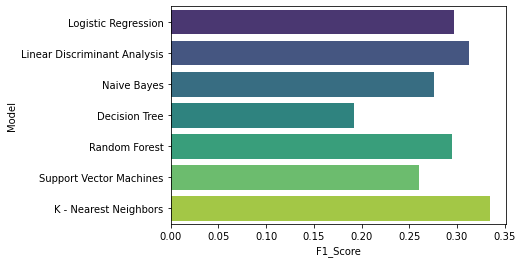

In [55]:
Classification_models(x_train, y_train, x_test, y_test)

### 50% imputation

In [56]:
data_50 = df.copy()

In [57]:
data_50 = data_50.iloc[:,1:8].mask(np.random.random(data_50.iloc[:,1:8].shape) < .5)
data_50

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,NaN,NaN,0.1010,NaN
1,NaN,0.265,NaN,NaN,NaN,NaN,0.0700
2,NaN,0.420,0.135,0.6770,NaN,NaN,0.2100
3,NaN,NaN,NaN,0.5160,0.2155,NaN,NaN
4,0.330,0.255,NaN,0.2050,NaN,NaN,0.0550
...,...,...,...,...,...,...,...
4172,0.565,NaN,NaN,0.8870,0.3700,NaN,NaN
4173,NaN,NaN,0.135,NaN,0.4390,NaN,0.2605
4174,NaN,NaN,NaN,NaN,NaN,0.2875,0.3080
4175,0.625,NaN,0.150,1.0945,0.5310,NaN,NaN


In [58]:
data_50['Sex'] = df["Sex"]
data_50['Rings']=df['Rings']
df_fifty = data_50.copy()

In [59]:
df_knn = df_fifty.copy()
df_knn

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,NaN,NaN,0.1010,NaN,2,15
1,NaN,0.265,NaN,NaN,NaN,NaN,0.0700,2,7
2,NaN,0.420,0.135,0.6770,NaN,NaN,0.2100,0,9
3,NaN,NaN,NaN,0.5160,0.2155,NaN,NaN,2,10
4,0.330,0.255,NaN,0.2050,NaN,NaN,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,NaN,NaN,0.8870,0.3700,NaN,NaN,0,11
4173,NaN,NaN,0.135,NaN,0.4390,NaN,0.2605,2,10
4174,NaN,NaN,NaN,NaN,NaN,0.2875,0.3080,2,9
4175,0.625,NaN,0.150,1.0945,0.5310,NaN,NaN,0,10


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [61]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [62]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.4550,0.3650,0.0950,0.74275,0.27275,0.10100,0.25515,2,15
1,0.3765,0.2650,0.0990,0.32730,0.14450,0.07475,0.07000,2,7
2,0.5775,0.4200,0.1350,0.67700,0.41340,0.21090,0.21000,0,9
3,0.5935,0.4435,0.1755,0.51600,0.21550,0.20240,0.34080,2,10
4,0.3300,0.2550,0.0940,0.20500,0.09730,0.06400,0.05500,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.5650,0.4780,0.1675,0.88700,0.37000,0.24270,0.32985,0,11
4173,0.5920,0.4280,0.1350,1.11870,0.43900,0.23020,0.26050,2,10
4174,0.5765,0.4315,0.1465,0.97900,0.40040,0.28750,0.30800,2,9
4175,0.6250,0.4635,0.1500,1.09450,0.53100,0.18615,0.33615,0,10


In [63]:
#getting features 
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [64]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
4                 Random Forest        0.457895
6         K - Nearest Neighbors        0.392105
1  Linear Discriminant Analysis        0.373684
0           Logistic Regression        0.368421
2                   Naive Bayes        0.365789
3                 Decision Tree        0.344737
5       Support Vector Machines        0.342105
                          Model  F1_Score
4                 Random Forest  0.427384
6         K - Nearest Neighbors  0.362958
1  Linear Discriminant Analysis  0.346607
3                 Decision Tree  0.343074
2                   Naive Bayes  0.320516
0           Logistic Regression  0.318973
5       Support Vector Machines  0.289581


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


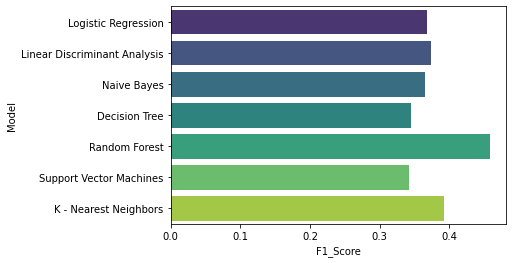

In [65]:
Classification_models(x_train, y_train, x_test, y_test)

### Using Decision Tree imputer

### 1% imputation

In [66]:
df_dt = df_one.copy()
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [67]:
df_dt.isnull().sum()

Length            51
Diameter          51
Height            50
Whole weight      43
Shucked weight    32
Viscera weight    49
Shell weight      41
Sex                0
Rings              0
dtype: int64

In [68]:
df_dt= df_dt.drop('Rings', axis=1)
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [69]:
#Standardize numerical Values
def standardize_col(col):
    return (col - col.min()) * 1.0 / (col.max() - col.min())

In [70]:
#order the columns of the dataframe according to decreasing number of null values, return list of column names
def ordered_cols(df):
  x = df.isna().sum()
  x = x.sort_values()
  x = x.to_frame()
  columns_sorted = x.index.values
  return list(columns_sorted)

In [71]:
class DecisionTree(object):
    """
    Class to create decision tree model (CART)
    """
    def __init__(self, _max_depth, _min_splits):
        self.max_depth = _max_depth
        self.min_splits = _min_splits

    def fit(self, _feature, _label):
        """
        :param _feature:
        :param _label:
        :return:
        """
        self.feature = _feature
        self.label = _label
        self.train_data = np.column_stack((self.feature,self.label))
        self.build_tree()


    def compute_gini_similarity(self, groups, class_labels):
        """
        compute the gini index for the groups and class labels
        :param groups:
        :param class_labels:
        :return:
        """
        num_sample = sum([len(group) for group in groups])
        gini_score = 0

        for group in groups:
            size = float(len(group))

            if size == 0:
                continue
            score = 0.0
            for label in class_labels:
                porportion = (group[:,-1] == label).sum() / size
                score += porportion * porportion
            gini_score += (1.0 - score) * (size/num_sample)

        return gini_score

    def terminal_node(self, _group):
        """
        Function set terminal node as the most common class in the group to make prediction later on
        is an helper function used to mark the leaf node in the tree based on the early stop condition
        or actual stop condition which ever is meet early
        :param _group:
        :return:
        """
        class_labels, count = np.unique(_group[:,-1], return_counts= True)
        return class_labels[np.argmax(count)]

    def split(self, index, val, data):
        """
        split features into two groups based on their values
        :param index:
        :param val:
        :param data:
        :return:
        """
        data_left = np.array([]).reshape(0,self.train_data.shape[1])
        data_right = np.array([]).reshape(0, self.train_data.shape[1])

        for row in data:
            if row[index] <= val :
                data_left = np.vstack((data_left,row))

            if row[index] > val:
                data_right = np.vstack((data_right, row))

        return data_left, data_right

    def best_split(self, data):
        """
        find the best split information using the gini score
        :param data:
        :return best_split result dict:
        """
        class_labels = np.unique(data[:,-1])
        best_index = 999
        best_val = 999
        best_score = 999
        best_groups = None

        for idx in range(data.shape[1]-1):
            for row in data:
                groups = self.split(idx, row[idx], data)
                gini_score = self.compute_gini_similarity(groups,class_labels)

                if gini_score < best_score:
                    best_index = idx
                    best_val = row[idx]
                    best_score = gini_score
                    best_groups = groups
        result = {}
        result['index'] = best_index
        result['val'] = best_val
        result['groups'] = best_groups
        return result


    def split_branch(self, node, depth):
        """
        recursively split the data and
        check for early stop argument based on self.max_depth and self.min_splits
        - check if left or right groups are empty is yess craete terminal node
        - check if we have reached max_depth early stop condition if yes create terminal node
        - Consider left node, check if the group is too small using min_split condition
            - if yes create terminal node
            - else continue to build the tree
        - same is done to the right side as well.
        else
        :param node:
        :param depth:
        :return:
        """
        left_node , right_node = node['groups']
        del(node['groups'])

        if not isinstance(left_node,np.ndarray) or not isinstance(right_node,np.ndarray):
            node['left'] = self.terminal_node(left_node + right_node)
            node['right'] = self.terminal_node(left_node + right_node)
            return

        if depth >= self.max_depth:
            node['left'] = self.terminal_node(left_node)
            node['right'] = self.terminal_node(right_node)
            return

        if len(left_node) <= self.min_splits:
            node['left'] = self.terminal_node(left_node)
        else:
            node['left'] = self.best_split(left_node)
            self.split_branch(node['left'],depth + 1)


        if len(right_node) <= self.min_splits:
            node['right'] = self.terminal_node(right_node)
        else:
            node['right'] = self.best_split(right_node)
            self.split_branch(node['right'],depth + 1)

    def build_tree(self):
        """
        build tree recursively with help of split_branch function
         - Create a root node
         - call recursive split_branch to build the complete tree
        :return:
        """
        self.root = self.best_split(self.train_data)
        self.split_branch(self.root, 1)
        return self.root

    def _predict(self, node, row):
        """
        Recursively traverse through the tress to determine the
        class of unseen sample data point during prediction
        :param node:
        :param row:
        :return:
        """
        if row[node['index']] < node['val']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'],dict):
                return self._predict(node['right'],row)
            else:
                return node['right']

    def predict(self, test_data):
        """
        predict the set of data point
        :param test_data:
        :return:
        """
        self.predicted_label = np.array([])
        for idx in test_data:
            self.predicted_label = np.append(self.predicted_label, self._predict(self.root,idx))

        return self.predicted_label

In [72]:
def impute(df):
  #initial imputed values
  
  Z = np.matrix(df['Sex']).reshape(-1,1)
  indexes_dict = {}
  
  #Get ordered list of col names except the session id which is always filled
  col_partial = ordered_cols(df.loc[:, df.columns != 'Sex'])
  col_list = col_partial
#   print(col_partial)
  
  
  for col in col_partial:
  #   print(col)
    y  = df[col]
  #   print(type(y))
    pos = list(y[y.isnull()].index)
  #   print(pos)
    indexes_dict[col] = pos

    X_train = np.delete(Z, pos, axis=0)
    X_test = Z[pos, :]
    y_train = np.matrix(y.drop(y.index[pos])).reshape(Z.shape[0]-len(pos),1)

    y_final = np.matrix(y).reshape(Z.shape[0],1)

  #   print(y.values.reshape(Z.shape[0],1)[pos[0]])
  #   X_test = Z.loc[pos].values#.reshape(1,-1)
  #   y_train = (y.drop(y.index[pos])).values(columns = 1)
  #   X_train = (Z.drop(Z.index[pos])).values
  #   X_train = (X_train).values#.reshape(-1,1)

    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, y_train)

    predicted = clf.predict(X_test)
  #   print(predicted)

    for i in range(len(pos)):
      ind = pos[i]
      y_final[ind] = predicted[i]

    Z = np.concatenate((Z,y_final),axis = 1)
  #   break
  
  #Converge 10 times
  for l in range(10):
    for colm in range(1,Z.shape[1]):
      column_name = col_partial[colm-1]
      pos = indexes_dict[column_name]

      X_train = np.delete(Z, colm, axis=1)
      X_train = np.delete(X_train, pos, axis=0)
      X_test = np.delete(Z[pos, :], colm, axis=1)
      y_train = Z[:, colm]
      y_train = np.delete(y_train, pos, axis=0)

  #     print(X_train.shape)
  #     print(X_test.shape)
  #     print(y_train.shape)

      clf = tree.DecisionTreeRegressor()
      clf = clf.fit(X_train, y_train)

      predicted = clf.predict(X_test)

      for i in range(len(pos)):
        ind = pos[i]
        Z[ind, colm] = predicted[i]
  
  col_list =  ['Sex'] + col_list
#   print(col_list)
  return pd.DataFrame(Z, columns=col_list)

In [73]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

Sex               0
Shucked weight    0
Shell weight      0
Whole weight      0
Viscera weight    0
Height            0
Length            0
Diameter          0
dtype: int64

### To get rmse value

In [74]:

# def plot_col(df):
#   col_cnt = 50
#   for col in df.columns:
#     if col != 'Outcome' :
#       print(col)
#     #   print(data_num_ordered[col].notnull())
#       obs_ind = list(np.where(df[col].notnull())[0])
# #       print(len(obs_ind))

#       x_values = []
#       y_values = []

#       data_copy = df
# #       print(df)
#       for i in range(floor(0.05*len(obs_ind))):
#         leave_ind = (random.choice(obs_ind))
#         x_values.append(data_copy[col][leave_ind])
#         data_copy[col][leave_ind] = np.nan

#         imputed = impute(df)
# #         print(type(imputed))
#         y_values.append(imputed[col][leave_ind])

# #         print(y_values)
#       rmse = mean_squared_error(x_values,y_values)
#       print("col: "+ str(col) + " rmse: "+ str(rmse) )
#       plt.figure()
#       plt.plot(x_values, x_values, 'r--', x_values, y_values, 'bo')
#       plt.xlabel('observed value')  
#       plt.ylabel('imputed value') 
#       plt.title(col)
#       plt.show()
      
#       col_cnt -=1
#       if col_cnt==0:
#         break

In [75]:
# plot_col(df_dt)

In [76]:
df_transform

,Sex,Shucked weight,Shell weight,Whole weight,Viscera weight,Height,Length,Diameter
0,2.0,0.2245,0.1500,0.5140,0.1010,0.095,0.455,0.365
1,2.0,0.0995,0.0700,0.2255,0.0485,0.090,0.350,0.265
2,0.0,0.2565,0.2100,0.6770,0.1415,0.135,0.530,0.420
3,2.0,0.2155,0.1550,0.5160,0.1140,0.125,0.440,0.365
4,1.0,0.0895,0.0550,0.2050,0.0395,0.080,0.330,0.255
...,...,...,...,...,...,...,...,...
4172,0.0,0.3700,0.2490,0.8870,0.2390,0.165,0.565,0.450
4173,2.0,0.4390,0.2605,0.9660,0.2145,0.135,0.590,0.440
4174,2.0,0.5255,0.3080,1.1760,0.2875,0.205,0.600,0.475
4175,0.0,0.5310,0.2960,1.0945,0.2610,0.150,0.625,0.485


In [77]:
#getting features 
x = df_transform

# Getting Predicting Value
y = df['Rings']

In [78]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.273684
0           Logistic Regression        0.265789
4                 Random Forest        0.255263
2                   Naive Bayes        0.250000
6         K - Nearest Neighbors        0.247368
5       Support Vector Machines        0.226316
3                 Decision Tree        0.165789
                          Model  F1_Score
1  Linear Discriminant Analysis  0.243730
4                 Random Forest  0.236844
6         K - Nearest Neighbors  0.227529
0           Logistic Regression  0.215351
2                   Naive Bayes  0.211254
5       Support Vector Machines  0.185828
3                 Decision Tree  0.162806


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


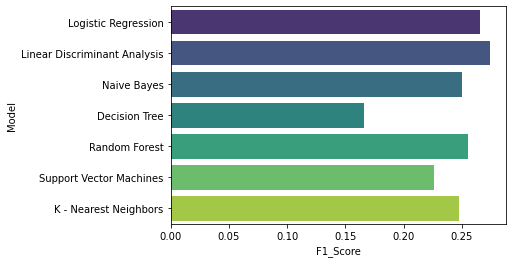

In [79]:
Classification_models(x_train, y_train, x_test, y_test)

### 5 % imputation

In [80]:
df_dt = df_five.copy()
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,NaN,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,NaN,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,NaN,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,NaN,0.2610,0.2960,0,10


In [81]:
df_dt.isnull().sum()

Length            222
Diameter          186
Height            201
Whole weight      198
Shucked weight    217
Viscera weight    226
Shell weight      202
Sex                 0
Rings               0
dtype: int64

In [82]:
df_dt= df_dt.drop('Rings', axis=1)
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,NaN,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,NaN,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,NaN,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,NaN,0.2610,0.2960,0


In [83]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

Sex               0
Diameter          0
Whole weight      0
Height            0
Shell weight      0
Shucked weight    0
Length            0
Viscera weight    0
dtype: int64

In [84]:
#getting features 
x = df_transform

# Getting Predicting Value
y = df['Rings']

In [85]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.276316
0           Logistic Regression        0.268421
2                   Naive Bayes        0.255263
6         K - Nearest Neighbors        0.252632
4                 Random Forest        0.242105
5       Support Vector Machines        0.234211
3                 Decision Tree        0.189474
                          Model  F1_Score
1  Linear Discriminant Analysis  0.243816
6         K - Nearest Neighbors  0.234926
4                 Random Forest  0.228553
0           Logistic Regression  0.216883
2                   Naive Bayes  0.215527
5       Support Vector Machines  0.192685
3                 Decision Tree  0.188645


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


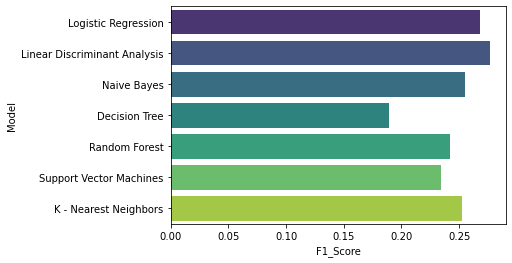

In [86]:
Classification_models(x_train, y_train, x_test, y_test)

### 10% imputation

In [87]:
df_dt = df_ten.copy()
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,NaN,2,15
1,0.350,0.265,NaN,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0,9
3,NaN,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,NaN,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [88]:
df_dt.isnull().sum()

Length            439
Diameter          459
Height            431
Whole weight      407
Shucked weight    433
Viscera weight    406
Shell weight      446
Sex                 0
Rings               0
dtype: int64

In [89]:
df_dt= df_dt.drop('Rings', axis=1)
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,NaN,2
1,0.350,0.265,NaN,0.2255,0.0995,0.0485,0.0700,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0
3,NaN,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,NaN,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [90]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

Sex               0
Viscera weight    0
Whole weight      0
Height            0
Shucked weight    0
Length            0
Shell weight      0
Diameter          0
dtype: int64

In [91]:
#getting features 
x = df_transform

# Getting Predicting Value
y = df['Rings']

In [92]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.281579
0           Logistic Regression        0.263158
2                   Naive Bayes        0.255263
6         K - Nearest Neighbors        0.255263
4                 Random Forest        0.247368
5       Support Vector Machines        0.228947
3                 Decision Tree        0.218421
                          Model  F1_Score
1  Linear Discriminant Analysis  0.252359
6         K - Nearest Neighbors  0.232363
4                 Random Forest  0.229384
3                 Decision Tree  0.218931
2                   Naive Bayes  0.216418
0           Logistic Regression  0.213183
5       Support Vector Machines  0.186212


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


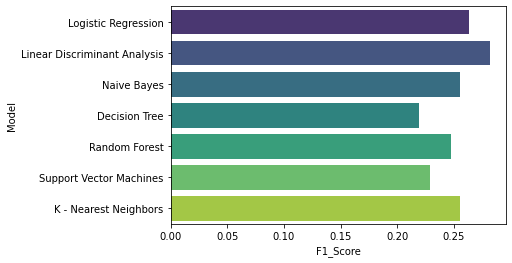

In [93]:
Classification_models(x_train, y_train, x_test, y_test)

### 20% imputation

In [94]:
df_dt = df_twenty.copy()
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,NaN,NaN,0.135,0.6770,NaN,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,NaN,NaN,0.2050,0.0895,0.0395,NaN,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,NaN,0.440,0.135,0.9660,0.4390,NaN,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [95]:
df_dt.isnull().sum()

Length            868
Diameter          836
Height            824
Whole weight      805
Shucked weight    878
Viscera weight    845
Shell weight      844
Sex                 0
Rings               0
dtype: int64

In [96]:
df_dt= df_dt.drop('Rings', axis=1)
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,NaN,NaN,0.135,0.6770,NaN,0.1415,0.2100,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,NaN,NaN,0.2050,0.0895,0.0395,NaN,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,NaN,0.440,0.135,0.9660,0.4390,NaN,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [97]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

Sex               0
Whole weight      0
Height            0
Diameter          0
Shell weight      0
Viscera weight    0
Length            0
Shucked weight    0
dtype: int64

In [98]:
#getting features 
x = df_transform

# Getting Predicting Value
y = df['Rings']

In [99]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
0           Logistic Regression        0.273684
1  Linear Discriminant Analysis        0.265789
6         K - Nearest Neighbors        0.263158
2                   Naive Bayes        0.247368
4                 Random Forest        0.247368
5       Support Vector Machines        0.231579
3                 Decision Tree        0.215789
                          Model  F1_Score
6         K - Nearest Neighbors  0.241634
1  Linear Discriminant Analysis  0.237427
4                 Random Forest  0.231305
0           Logistic Regression  0.221665
3                 Decision Tree  0.210121
2                   Naive Bayes  0.206626
5       Support Vector Machines  0.191683


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


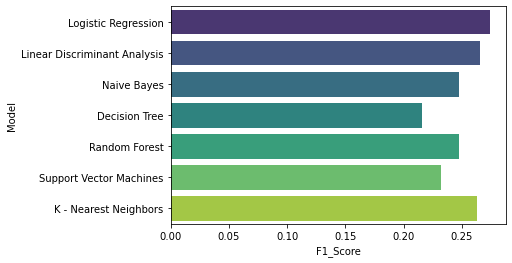

In [100]:
Classification_models(x_train, y_train, x_test, y_test)

### 50% imputation

In [101]:
df_dt = df_fifty.copy()
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,NaN,NaN,0.1010,NaN,2,15
1,NaN,0.265,NaN,NaN,NaN,NaN,0.0700,2,7
2,NaN,0.420,0.135,0.6770,NaN,NaN,0.2100,0,9
3,NaN,NaN,NaN,0.5160,0.2155,NaN,NaN,2,10
4,0.330,0.255,NaN,0.2050,NaN,NaN,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,NaN,NaN,0.8870,0.3700,NaN,NaN,0,11
4173,NaN,NaN,0.135,NaN,0.4390,NaN,0.2605,2,10
4174,NaN,NaN,NaN,NaN,NaN,0.2875,0.3080,2,9
4175,0.625,NaN,0.150,1.0945,0.5310,NaN,NaN,0,10


In [102]:
df_dt.isnull().sum()

Length            2104
Diameter          2116
Height            2081
Whole weight      2038
Shucked weight    2066
Viscera weight    2101
Shell weight      2104
Sex                  0
Rings                0
dtype: int64

In [103]:
df_dt= df_dt.drop('Rings', axis=1)
df_dt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,0.455,0.365,0.095,NaN,NaN,0.1010,NaN,2
1,NaN,0.265,NaN,NaN,NaN,NaN,0.0700,2
2,NaN,0.420,0.135,0.6770,NaN,NaN,0.2100,0
3,NaN,NaN,NaN,0.5160,0.2155,NaN,NaN,2
4,0.330,0.255,NaN,0.2050,NaN,NaN,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,NaN,NaN,0.8870,0.3700,NaN,NaN,0
4173,NaN,NaN,0.135,NaN,0.4390,NaN,0.2605,2
4174,NaN,NaN,NaN,NaN,NaN,0.2875,0.3080,2
4175,0.625,NaN,0.150,1.0945,0.5310,NaN,NaN,0


In [104]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

Sex               0
Whole weight      0
Shucked weight    0
Height            0
Viscera weight    0
Length            0
Shell weight      0
Diameter          0
dtype: int64

In [105]:
#getting features 
x = df_transform

# Getting Predicting Value
y = df['Rings']

In [106]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.276316
0           Logistic Regression        0.268421
6         K - Nearest Neighbors        0.252632
2                   Naive Bayes        0.218421
5       Support Vector Machines        0.215789
4                 Random Forest        0.213158
3                 Decision Tree        0.192105
                          Model  F1_Score
1  Linear Discriminant Analysis  0.241183
6         K - Nearest Neighbors  0.223463
0           Logistic Regression  0.213091
4                 Random Forest  0.201964
2                   Naive Bayes  0.187625
3                 Decision Tree  0.187534
5       Support Vector Machines  0.178809


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


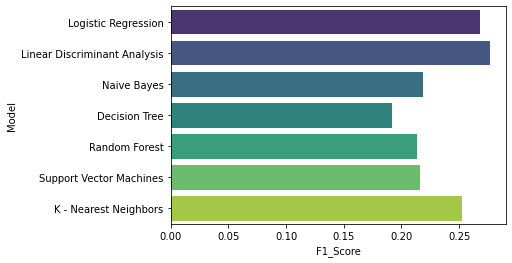

In [107]:
Classification_models(x_train, y_train, x_test, y_test)

### Using MissForest Imputation method

### 1% imputation

In [108]:
df_mf = df_one.copy()
df_mf

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [109]:
df_mf.isnull().sum()

Length            51
Diameter          51
Height            50
Whole weight      43
Shucked weight    32
Viscera weight    49
Shell weight      41
Sex                0
Rings              0
dtype: int64

In [110]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 5


Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Sex               0
Rings             0
dtype: int64

In [111]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [112]:
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [113]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.276316
0           Logistic Regression        0.273684
4                 Random Forest        0.252632
2                   Naive Bayes        0.250000
6         K - Nearest Neighbors        0.239474
5       Support Vector Machines        0.223684
3                 Decision Tree        0.163158
                          Model  F1_Score
1  Linear Discriminant Analysis  0.249610
4                 Random Forest  0.235951
0           Logistic Regression  0.222046
6         K - Nearest Neighbors  0.221918
2                   Naive Bayes  0.211254
5       Support Vector Machines  0.183443
3                 Decision Tree  0.159401


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


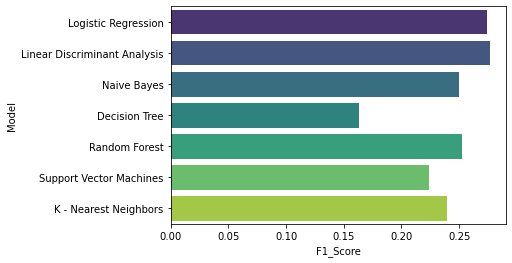

In [114]:
Classification_models(x_train, y_train, x_test, y_test)

### 5% imputation

In [115]:
df_mf = df_five.copy()
df_mf

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,NaN,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,NaN,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,NaN,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,NaN,0.2610,0.2960,0,10


In [116]:
df_mf.isnull().sum()

Length            222
Diameter          186
Height            201
Whole weight      198
Shucked weight    217
Viscera weight    226
Shell weight      202
Sex                 0
Rings               0
dtype: int64

In [117]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 5


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 6


Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Sex               0
Rings             0
dtype: int64

In [118]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.46905,0.36500,0.095,0.5140,0.224500,0.1010,0.150000,2,15
1,0.35000,0.26500,0.090,0.2255,0.099500,0.0485,0.066995,2,7
2,0.53000,0.42000,0.135,0.6770,0.256500,0.1415,0.220120,0,9
3,0.44000,0.36500,0.125,0.5160,0.215500,0.1140,0.164030,2,10
4,0.33000,0.25500,0.080,0.2050,0.089500,0.0395,0.055000,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.56500,0.45000,0.165,0.8870,0.370000,0.2390,0.249000,0,11
4173,0.59000,0.44000,0.135,0.9660,0.439000,0.2145,0.260500,2,10
4174,0.60700,0.47500,0.205,1.1760,0.525500,0.2875,0.308000,2,9
4175,0.62500,0.48500,0.150,1.0945,0.503265,0.2610,0.296000,0,10


In [119]:
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [120]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
0           Logistic Regression        0.271053
4                 Random Forest        0.265789
1  Linear Discriminant Analysis        0.263158
2                   Naive Bayes        0.255263
6         K - Nearest Neighbors        0.250000
5       Support Vector Machines        0.231579
3                 Decision Tree        0.200000
                          Model  F1_Score
4                 Random Forest  0.248502
1  Linear Discriminant Analysis  0.235848
6         K - Nearest Neighbors  0.224460
0           Logistic Regression  0.219247
2                   Naive Bayes  0.216181
3                 Decision Tree  0.192500
5       Support Vector Machines  0.188822


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


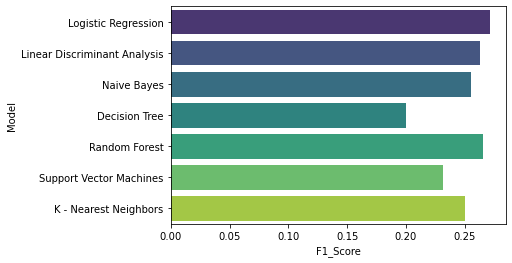

In [121]:
Classification_models(x_train, y_train, x_test, y_test)

### 10% imputation

In [122]:
df_mf = df_ten.copy()
df_mf

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,NaN,2,15
1,0.350,0.265,NaN,0.2255,0.0995,0.0485,0.0700,2,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,NaN,0,9
3,NaN,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,NaN,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [123]:
df_mf.isnull().sum()

Length            439
Diameter          459
Height            431
Whole weight      407
Shucked weight    433
Viscera weight    406
Shell weight      446
Sex                 0
Rings               0
dtype: int64

In [124]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 5


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 6


Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Sex               0
Rings             0
dtype: int64

In [125]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.4550,0.365,0.09500,0.5140,0.224500,0.1010,0.154385,2,15
1,0.3500,0.265,0.09265,0.2255,0.099500,0.0485,0.070000,2,7
2,0.5300,0.420,0.13500,0.6770,0.256500,0.1415,0.222180,0,9
3,0.4705,0.365,0.12500,0.5160,0.215500,0.1140,0.155000,2,10
4,0.3300,0.255,0.08000,0.2050,0.089500,0.0395,0.055000,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.5650,0.450,0.16500,0.8870,0.370000,0.2390,0.249000,0,11
4173,0.5900,0.440,0.13500,0.9660,0.439000,0.2145,0.260500,2,10
4174,0.6000,0.475,0.20500,1.1760,0.509215,0.2875,0.308000,2,9
4175,0.6250,0.485,0.15000,1.0945,0.531000,0.2610,0.296000,0,10


In [126]:
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [127]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


                          Model  Accuracy_Score
1  Linear Discriminant Analysis        0.297368
0           Logistic Regression        0.281579
6         K - Nearest Neighbors        0.265789
4                 Random Forest        0.260526
2                   Naive Bayes        0.255263
5       Support Vector Machines        0.223684
3                 Decision Tree        0.218421
                          Model  F1_Score
1  Linear Discriminant Analysis  0.265755
4                 Random Forest  0.248796
6         K - Nearest Neighbors  0.245567
0           Logistic Regression  0.227734
2                   Naive Bayes  0.216390
3                 Decision Tree  0.212806
5       Support Vector Machines  0.183772


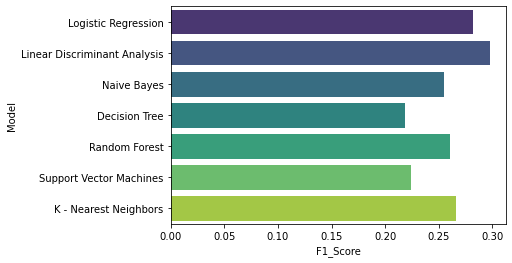

In [128]:
Classification_models(x_train, y_train, x_test, y_test)

### 20% imputation

In [129]:
df_mf = df_twenty.copy()
df_mf

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,7
2,NaN,NaN,0.135,0.6770,NaN,0.1415,0.2100,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,10
4,0.330,NaN,NaN,0.2050,0.0895,0.0395,NaN,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,11
4173,NaN,0.440,0.135,0.9660,0.4390,NaN,0.2605,2,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,10


In [130]:
df_mf.isnull().sum()

Length            868
Diameter          836
Height            824
Whole weight      805
Shucked weight    878
Viscera weight    845
Shell weight      844
Sex                 0
Rings               0
dtype: int64

In [131]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 5


Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Sex               0
Rings             0
dtype: int64

In [132]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.45500,0.365,0.09500,0.5140,0.22450,0.101000,0.15000,2,15
1,0.35000,0.265,0.09000,0.2255,0.09950,0.048500,0.07000,2,7
2,0.52110,0.408,0.13500,0.6770,0.30121,0.141500,0.21000,0,9
3,0.44000,0.365,0.12500,0.5160,0.21550,0.114000,0.15500,2,10
4,0.33000,0.255,0.08825,0.2050,0.08950,0.039500,0.05853,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.56500,0.450,0.16500,0.8870,0.37000,0.239000,0.24900,0,11
4173,0.56715,0.440,0.13500,0.9660,0.43900,0.200235,0.26050,2,10
4174,0.60000,0.475,0.20500,1.1760,0.52550,0.287500,0.30800,2,9
4175,0.62500,0.485,0.15000,1.0945,0.53100,0.261000,0.29600,0,10


In [133]:
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [134]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                          Model  Accuracy_Score
6         K - Nearest Neighbors        0.284211
1  Linear Discriminant Analysis        0.281579
0           Logistic Regression        0.263158
4                 Random Forest        0.257895
2                   Naive Bayes        0.252632
5       Support Vector Machines        0.228947
3                 Decision Tree        0.207895
                          Model  F1_Score
6         K - Nearest Neighbors  0.263707
1  Linear Discriminant Analysis  0.254259
4                 Random Forest  0.240198
2                   Naive Bayes  0.214371
0           Logistic Regression  0.213254
3                 Decision Tree  0.204355
5       Support Vector Machines  0.192358


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


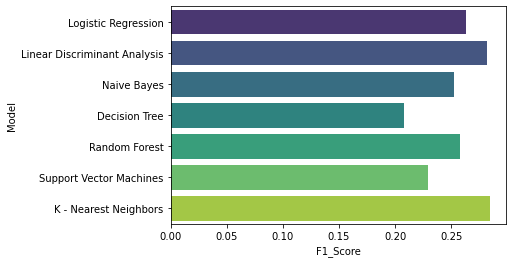

In [135]:
Classification_models(x_train, y_train, x_test, y_test)

### 50% imputation

In [136]:
df_mf = df_fifty.copy()
df_mf

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex,Rings
0,0.455,0.365,0.095,NaN,NaN,0.1010,NaN,2,15
1,NaN,0.265,NaN,NaN,NaN,NaN,0.0700,2,7
2,NaN,0.420,0.135,0.6770,NaN,NaN,0.2100,0,9
3,NaN,NaN,NaN,0.5160,0.2155,NaN,NaN,2,10
4,0.330,0.255,NaN,0.2050,NaN,NaN,0.0550,1,7
...,...,...,...,...,...,...,...,...,...
4172,0.565,NaN,NaN,0.8870,0.3700,NaN,NaN,0,11
4173,NaN,NaN,0.135,NaN,0.4390,NaN,0.2605,2,10
4174,NaN,NaN,NaN,NaN,NaN,0.2875,0.3080,2,9
4175,0.625,NaN,0.150,1.0945,0.5310,NaN,NaN,0,10


In [137]:
df_mf.isnull().sum()

Length            2104
Diameter          2116
Height            2081
Whole weight      2038
Shucked weight    2066
Viscera weight    2101
Shell weight      2104
Sex                  0
Rings                0
dtype: int64

In [ ]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf),columns = df_mf.columns)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [ ]:
df_transform['Sex'] = df_transform['Sex'].astype('int')
df_transform['Rings'] = df_transform['Rings'].astype('int')
df_transform

In [ ]:
x = df_transform.drop('Rings', axis = 1)

# Getting Predicting Value
y = df_transform['Rings']

In [ ]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [ ]:
Classification_models(x_train, y_train, x_test, y_test)